Most of the content presented in this notebook is inspired by the following content.

[Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)

[Python Pandas Tutorial (Part 10): Working with Dates and Time Series Data](https://www.youtube.com/watch?v=UFuo7EHI8zc&ab_channel=CoreySchafer)

__Agenda__

- Introduction to modules and libraries to handle time and dates in Python

- Introduction to tools available in Pandas library to work with time and dates.

# Libraries to work with Time and Dates in Python

## Datetime Module

In [ ]:
## import datetime module

from datetime import datetime
# import datetime


What does it mean to import datetime from datetime? 

https://github.com/python/cpython/blob/3.10/Lib/datetime.py


In [ ]:
## now we can create a datetime object

d = datetime(year = 2021, month = 10, day = 28)
# d - datetime(year = 2021, month = 11, day = 28)

In [ ]:
# '2021-10-28'

To check other arguments: https://docs.python.org/3/library/datetime.html#datetime.datetime

[Also we might want to talk about `aware` and `naive` object categories](https://docs.python.org/3/library/datetime.html#aware-and-naive-objects)

## Dateutil Library

In [ ]:
## we could also use dateutil library to parse time and date
## note that dateutil is a third-party library and needs to be installed first.

## let's import parser from dateutil

from dateutil import parser


[Dateutil - Pypi](https://pypi.org/project/python-dateutil/)

In [ ]:
## parser allow us to convert strings to datetime.datetime objects

## parser has a parse method to parse strings

parser.parse('July 4th 2021')

Note that the result is `datetime` object.

In [ ]:
## note that this is pretty robust

parser.parse('4th of July 2021')

parser.parse('2021, July 4')

parser.parse('2021/07/04')

parser.parse('28th Oct. 2021')

__Working with `datetime` object__


In [ ]:
## let's create a datetime object let's say my birthday 03-15-1982

my_birthday = datetime(year = 1982, month= 3, day = 15)
my_birthday

In [ ]:
## we can check the day of the week

my_birthday.strftime('%A')

In [ ]:
## note that using .strftime method we can convert the time into any string format.

my_birthday.strftime('(%a)-%d-%B-%Y')

[Reference to `strfformat` directives](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [ ]:
my_birthday.strftime('%a')

# Numpy `datetime64` type

Why another data type?: Efficient storage and vectorized operations

In [ ]:
import numpy as np

In [ ]:
## note that in the case of working with a lot dates and time 
## this is the compact way to store data
date = np.array(['2021-10-28'], dtype = 'datetime64')
## use np.array with dtype argument to create today as np.datetime64 object

date
# date[0].astype(object).year


[Numpy - Datetime Documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html)

In [ ]:
## note that we can easily apply vectorized operations

date + np.arange(12)

Note that numpy automatically choosed 'D' as the unit.

In [ ]:
date = np.array(['2021-10-28'], dtype = 'datetime64[s]')

date + np.arange(12)

[All available datetime-units](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units)

## Date and Times in Pandas

In [ ]:
## let's import pandas
import pandas as pd

In [ ]:
## the most basic data structure that pandas using is Timestamp
pd.Timestamp(year=2021, month=11, day=8)


In [ ]:
## to create it we can use pd.to_datetime
pd.to_datetime('Nov 3 2021')

In [ ]:
t = pd.to_datetime('Nov 3 2021')

# help(t)

[pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

[Pandas Timestamp Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html)

In [ ]:
## note that pandas uses both datetime module and numpy.datetime64 data dtype
## so we can use some of the methods used in these modules. 

In [ ]:
t.day_name()

In [ ]:
t.month_name()

In [ ]:
## there are also some additional methods that are very hadny when you analyze data.
# help(t)
# dir(t)
# t.to_datetime64()

In [ ]:
## let's consider the following example

data_url ='https://raw.githubusercontent.com/mguner/teaching/main/datasets/CoreSchafer/ETH-1.csv'
df = pd.read_csv(data_url)

[What is Ethereum](https://ethereum.org/en/eth/)

In [ ]:
## check the head

df.head()

In [ ]:
df.dtypes

In [ ]:
## note that in this case 
## it is not straightforward to convert strings to datetime

## let's try pd.to_datetime
pd.to_datetime(df.Date)

In [ ]:
## We can use the format parameter to give the format of the string

pd.to_datetime(df.Date, format = '%Y-%m-%d %I-%p')

[pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

[strftime - strptime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [ ]:
## we could also directly load the data and parse the date as datetime

## for some cases it is very easy to do!
## use parse_dates and infer_datetime_format in pd.read_csv
df1 = pd.read_csv(data_url , parse_dates= ['Date'],infer_datetime_format= True)

## but this example is not one of those!
df1.dtypes

In [ ]:
df1.Date[0]

In [ ]:
## in this case we need to pass a parser to date_parser argument

## define my_time_parser
## this takes a string and return pd.to_datetime 
def my_time_parser(date):
    return

## or we could use datetime.strptime mehtod

## again use read_csv but this time pass my_time_parser to date_parser argument



In [ ]:
## in this case we need to pass a parser to date_parser argument
def my_time_parser(date):
    return pd.to_datetime(date, format =  '%Y-%m-%d %I-%p' ) ## or we could use datetime.strptime mehtod

df1 = pd.read_csv(data_url, 
                  parse_dates= ['Date'], 
                  date_parser = my_time_parser)

df1.Date[0]

In [ ]:
## note that we could directly pass a lambda function too.

df1 = pd.read_csv(data_url, 
                  parse_dates= ['Date'], 
                  date_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %I-%p')
#                   date_parser = lambda x: pd.to_datetime(x, format =  '%Y-%m-%d %I-%p' )
                 )

df1.Date

In [ ]:
## note that each entry is an timestamp

df1.Date[0]

In [ ]:
## so we can use the timestamp methods

df1.Date[0].day_name()

In [ ]:
## but if we try to use these methods on all of the series this might not work

df1.Date.day_name()

In [ ]:
## Instead we should use .dt class to be able to access datetime methods.

df1.Date.dt.day_name()

In [ ]:
## check min of date

df1.Date.min()

In [ ]:
## check max of date

df1.Date.max()

In [ ]:
## note that the result is timedelta type

dt = df1.Date.max() - df1.Date.min()
dt

In [ ]:
# dt.days


__TimeDeltas__

In [ ]:
## note that we can still use vectorized operations

today = datetime.now()

today + pd.to_timedelta(np.arange(10), unit='D')

In [ ]:
## note again that we get timedelta objects when we check the difference of two timestamps
delta = df1.Date - df1.Date.min()
delta

In [ ]:
# help(delta[0])
# delta[0].seconds

### Indexing by time

When you are working with time data it is generally good idea to index your dataframe with the time.

In [ ]:
df1.dtypes

In [ ]:
## let's set the index key as 'Date' column

df1.set_index(keys='Date', inplace=True)

In [ ]:
df1.dtypes

In [ ]:
df1.head()

In [ ]:
df1.index[:5]

In [ ]:
## another way of indexing a dataframe with DatetimeIndex is 
## when you create the dataframe
index = pd.DatetimeIndex(['2018-11-24', '2019-9-25', '2020-10-21', '2021-10-27', '2021-10-28'])

data = pd.Series([2,3,5,7,11], index= index)

data.index

In [ ]:
## Advantage of working with a dataframe index with DatetimeIndex
df1.head()
## now we can slice our data very easily
## let's get all the rows from 2020-01

df1['2020-01': '2020-02-01']

## Resampling

### Resample vs Asfreq

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

In [ ]:
## first make sure that you sort your index 
df1.sort_index(inplace=True)

## let's create a variable open for the opening values of the Ethereum

open_val = df1.Open

open_val

[Date Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [ ]:
## here use resample with 'BA' offset
open_val.resample('BA').mean()

In [ ]:
## here use resample with 'BA' offset
open_val.resample('BAS').mean()

In [ ]:
## here use asfreq method with 'BA' offset and compare

open_val.asfreq('BA')

In [ ]:
## Plot them in the same plot
plt.plot(open_val.resample('BA').mean())
plt.plot(open_val.asfreq('BA'))
plt.xticks(rotation =45)
plt.show()

In [ ]:
from matplotlib import dates

# Locators and formatters

In [ ]:
plt.plot(open_val.resample('BA').mean())
plt.plot(open_val.asfreq('BA'))
plt.xticks(rotation =45)

ax = plt.gca()
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y %B'))

ax.xaxis.set_minor_locator(dates.MonthLocator())

plt.show()

In [ ]:
# df3 = df1['2020-01': '2020-02']

# ax = df3.Open.plot()
# ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=(0), interval=7))

# plt.show()

### Rolling Windows

[Moving Average](https://towardsdatascience.com/dont-miss-out-on-rolling-window-functions-in-pandas-850b817131db)

In [ ]:
rolling = open_val.rolling(365, center =False)

data = pd.DataFrame({'input': open_val,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
# data

ax = data.plot(style=['-', '--', ':'], figsize = (15,7))
ax.lines[0].set_alpha(0.3)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html


# Lab

[Follow this tutorial to replicate the results](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Example:-Visualizing-Seattle-Bicycle-Counts)

[Read this blog](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)

In [1]:
import pandas as pd
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [2]:
data.columns = ['Total','West', 'East']
data['Total'] = data.eval('West + East')

In [3]:
data.dropna().describe()

,Total,West,East
count,144352.000000,144352.000000,144352.000000
mean,111.188013,50.529241,60.658772
std,141.260941,65.050403,87.812023
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,146.000000,68.000000,75.000000
max,1097.000000,698.000000,850.000000


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

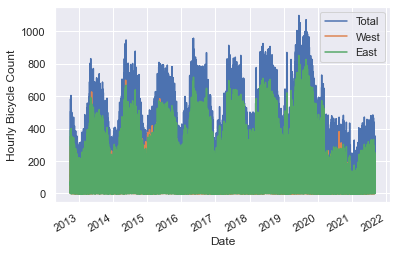

In [7]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

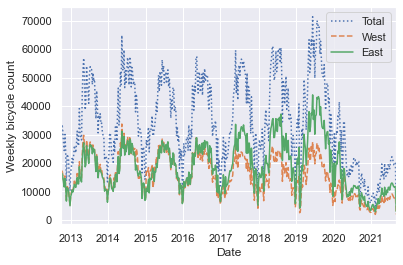

In [8]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

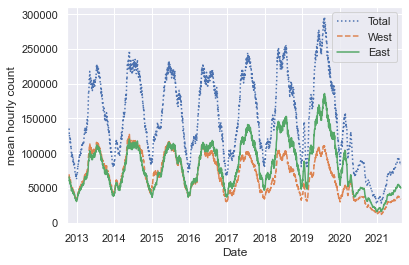

In [9]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

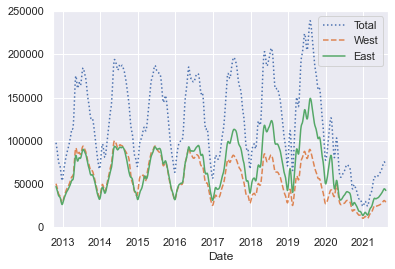

In [10]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

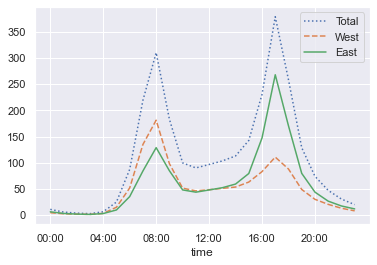

In [12]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

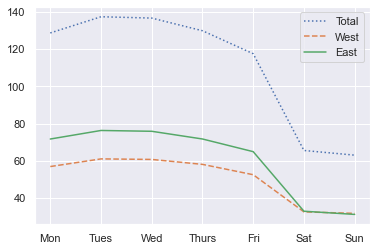

In [13]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [14]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

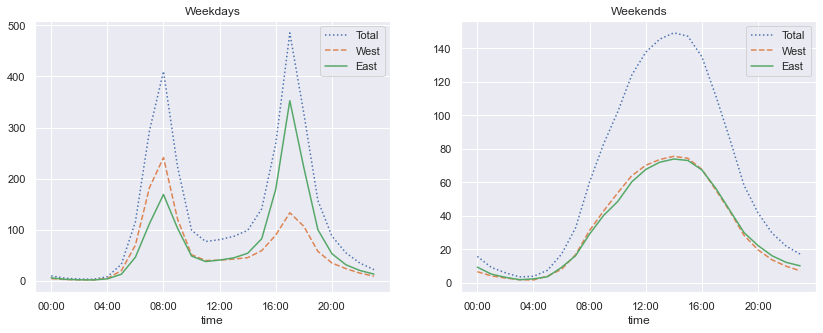

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);